<a href="https://colab.research.google.com/github/veysipunuh/202155202062-veysi/blob/master/veysitrivenapunuh/tugasDLTM4/running_50eoch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3362%2F31148%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240502%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240502T130717Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7f0b69e97b14aefc6d3ac780878a7eb7cfc68e396e311a70b6cb5801df0439da75fec95ae09d23aa23cea8d4012f7bca67b91ad1eb6b4bac7542370ffdf1b55d96e4a8b063dfa7a772266752de86f1b0b535c80141b9a01978feff30a81b6aba833ab9729b66ed0717481339b06338cfabbfb4071e71b7f7425955b5171646c75b0208d7d8c2889ced1fb1a2b71078331a34a5906f8a9bc4cc27dc38db61b04b2915d82d592c93a666e64e5d176d8865a6e4b883c8297a7997faeb8b4859a8070dcc6351b630a2a08112ae0deee7243c1e759208c2f8acef7af0050da81cfac61a7eac0a0ebaa2dc23a2e155a5aae3c9616ff5cec625968a6b521f749b4b2c9b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 851576689 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


## Dogs vs. Cats
-2018. 12. 25 <br>
-Image Binary Classification

In [ ]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.model_selection import train_test_split

import tensorflow_hub as hub

#### Library Importing

In [ ]:
import keras
import numpy as np
import pandas as pd
from PIL import Image as img

In [ ]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

#### Change Image Data Format

In [ ]:
keras.backend.image_data_format()

'channels_last'

In [ ]:
keras.backend.set_image_data_format("channels_first")
keras.backend.image_data_format()

'channels_first'

#### Data Preview

In [ ]:
import os
import zipfile

# Ekstrak folder test1
with zipfile.ZipFile('/../input/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/../input/')

# Ekstrak folder train
with zipfile.ZipFile('/../input/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/../input/')

# Ubah nama folder
os.rename('/../input/test1', '/../input/test1')
os.rename('/../input/train', '/../input/train')


In [ ]:
import glob
import random
import os

# Mencari semua file dengan pola "../input/train/dog.*.jpg"
dog_file_list = glob.glob("../input/train/dog.*.jpg")
cat_file_list = glob.glob("../input/train/cat.*.jpg")

# Menghitung jumlah file dalam masing-masing daftar
jumlah_dog_files = len(dog_file_list)
jumlah_cat_files = len(cat_file_list)

# Menghitung jumlah file yang akan dihapus (50% dari total)
jumlah_hapus_dog = int(jumlah_dog_files * 0.5)
jumlah_hapus_cat = int(jumlah_cat_files * 0.5)

# Mengacak urutan file dalam daftar
random.shuffle(dog_file_list)
random.shuffle(cat_file_list)

# Menghapus file dari daftar yang telah diacak
file_yang_dihapus_dog = dog_file_list[:jumlah_hapus_dog]
file_yang_dihapus_cat = cat_file_list[:jumlah_hapus_cat]

for file in file_yang_dihapus_dog:
    os.remove(file)

for file in file_yang_dihapus_cat:
    os.remove(file)

print("Jumlah file anjing setelah penghapusan:", len(glob.glob("../input/train/dog.*.jpg")))
print("Jumlah file kucing setelah penghapusan:", len(glob.glob("../input/train/cat.*.jpg")))


Jumlah file anjing setelah penghapusan: 6250
Jumlah file kucing setelah penghapusan: 6250


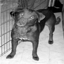

In [ ]:
img.open("../input/train/dog.1.jpg").resize((64, 64)).convert("L")

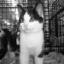

In [ ]:
img.open("../input/train/cat.1000.jpg").resize((64, 64)).convert("L")

#### Data Load(for Training)

In [ ]:
dog_train_list = glob.glob("../input/train/dog.*.jpg")
cat_train_list = glob.glob("../input/train/cat.*.jpg")

In [ ]:
x_train = []

for i in tqdm(dog_train_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")

    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))

#    if not idx % 200:
#        print(idx)

y_train = np.tile(1, len(dog_train_list)*4)
print("dog's images loading is done")

100%|██████████| 12500/12500 [00:43<00:00, 290.45it/s]

dog's images loading is done


In [ ]:
for i in tqdm(cat_train_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")

    x_train.append((np.array(temp) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(90)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(180)) - np.mean(temp)) / np.std(temp))
    x_train.append((np.array(temp.rotate(270)) - np.mean(temp)) / np.std(temp))

y_train = np.concatenate((y_train, np.tile(0, len(cat_train_list)*4))).astype("uint8")
print("cat's images loading is done")

100%|██████████| 12500/12500 [00:41<00:00, 302.54it/s]

cat's images loading is done


In [ ]:
a = np.asarray(x_train)
x_train = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [ ]:
del(a)

In [ ]:
x_train.shape

(100000, 1, 64, 64)

---

#### Model Generate

In [ ]:
LeakyReLU = keras.layers.LeakyReLU(alpha=0.01)

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=(2, 2), input_shape=(1, 64, 64)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3)))
model.add(LeakyReLU)
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Conv2D(filters=64, activation="relu", kernel_size=(3, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(3, 3)))
model.add(keras.layers.Dropout(rate=0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=12, activation="relu"))
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.binary_crossentropy, metrics=["binary_accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 63, 63)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     multiple                  0         
                                                                 
 dropout (Dropout)           (None, 32, 63, 63)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 61, 61)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 32, 61, 61)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 59, 59)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 19, 19)        0

In [ ]:
model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.1, shuffle=True)

Epoch 1/10
1/1 [==============================] - 0s 71ms/step - loss: 0.7253 - accuracy: 0.3333 - val_loss: 0.6181 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 0.7212 - accuracy: 0.3333 - val_loss: 0.6267 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 25ms/step - loss: 0.7171 - accuracy: 0.3333 - val_loss: 0.6354 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 25ms/step - loss: 0.7130 - accuracy: 0.3333 - val_loss: 0.6439 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 0.7090 - accuracy: 0.3333 - val_loss: 0.6525 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 27ms/step - loss: 0.7050 - accuracy: 0.3333 - val_loss: 0.6611 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 25ms/step - loss: 0.7011 - accuracy: 0.3333 - val_loss: 0.6696 - val_accuracy: 1.0000
Epoch 8/10
1/1 [===========

In [ ]:
model.save("Dogs_Cats_model_01.h5")

In [ ]:
model = keras.models.load_model("Dogs_Cats_model_01.h5")

In [ ]:
model.fit(x=x_train, y=y_train, epochs=2, validation_split=0.1, shuffle=True)

Epoch 1/2
1/1 [==============================] - 1s 873ms/step - loss: 0.6789 - accuracy: 0.3333 - val_loss: 0.7483 - val_accuracy: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 0s 39ms/step - loss: 0.6742 - accuracy: 0.3333 - val_loss: 0.7599 - val_accuracy: 0.0000e+00


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_accuracy'])
len(model.history.history["accuracy"])

2

In [ ]:
np.arange(1, len(model.history.history["accuracy"])+1, 1)

array([1, 2])

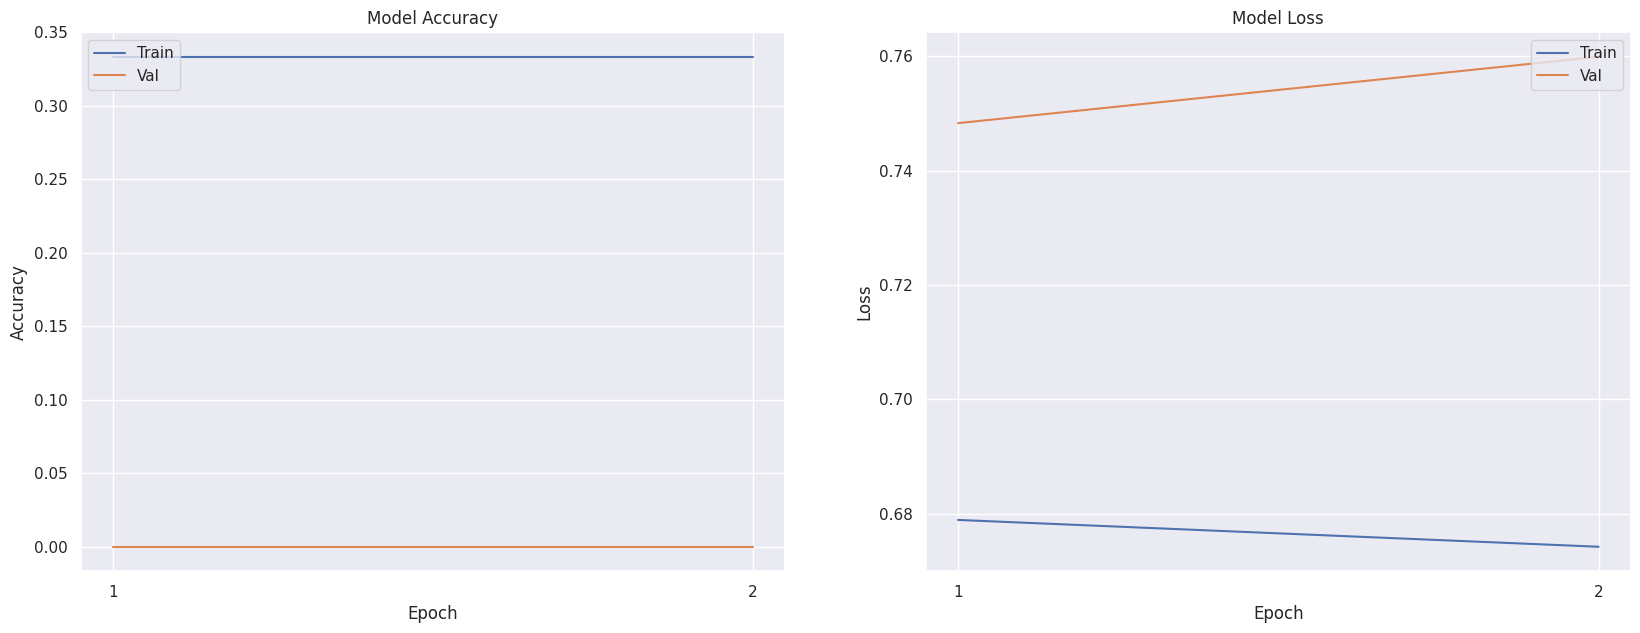

In [ ]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
#plt.xticks(np.arange(0, len(model.history.history["binary_accuracy"]), 1))

plt.xticks(np.arange(len(model.history.history["accuracy"])), np.arange(1, len(model.history.history["accuracy"])+1, 1))

plt.subplot(1, 2, 2)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.xticks(np.arange(len(model.history.history["loss"])), np.arange(1, len(model.history.history["loss"])+1, 1))
plt.show()


In [ ]:
test_list = glob.glob("../input/test1/*.jpg")

In [ ]:
x_test = []

for i in tqdm(test_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    x_test.append((np.array(temp) - np.mean(temp)) / np.std(temp))

print("test images loading is done")

100%|██████████| 12500/12500 [00:32<00:00, 378.91it/s]

test images loading is done


In [ ]:
a = np.asarray(x_test)
x_test = a.reshape(a.shape[0], 1, a.shape[1], a.shape[2])

In [ ]:
del(a)

In [101]:
import numpy as np

# Reshape x_test to match the model input shape
x_test_reshaped = x_test.reshape(x_test.shape[0], 64, 64, 1)

# Now you can use the reshaped data for prediction
result = model.predict(x=x_test_reshaped)


391/391 [==============================] - 53s 135ms/step


#### Model Training

In [ ]:
# Defining data generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255.,
                              validation_split = 0.1,
                              zoom_range = 0.2,
                              horizontal_flip= True,
                              rotation_range = 20,
                              width_shift_range=0.2,
                              height_shift_range=0.2)

train_data = data_gen.flow_from_directory("../input",
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory("../input",
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 33750 images belonging to 2 classes.
Found 3750 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.set_logical_device_configuration(
        physical_devices[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=2048)])


In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4963127224619410290
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4380813920880116033
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Epoch 1/50
1/1 [==============================] - 1s 703ms/step - loss: 0.6479 - accuracy: 1.0000 - val_loss: 0.7728 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 27ms/step - loss: 0.6435 - accuracy: 0.6667 - val_loss: 0.7847 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6393 - accuracy: 0.6667 - val_loss: 0.7965 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6351 - accuracy: 0.6667 - val_loss: 0.8084 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6310 - accuracy: 0.6667 - val_loss: 0.8202 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6270 - accuracy: 0.6667 - val_loss: 0.8321 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6230 - accuracy: 0.6667 - val_loss: 0.8440 - val_accuracy: 0.0000e+0

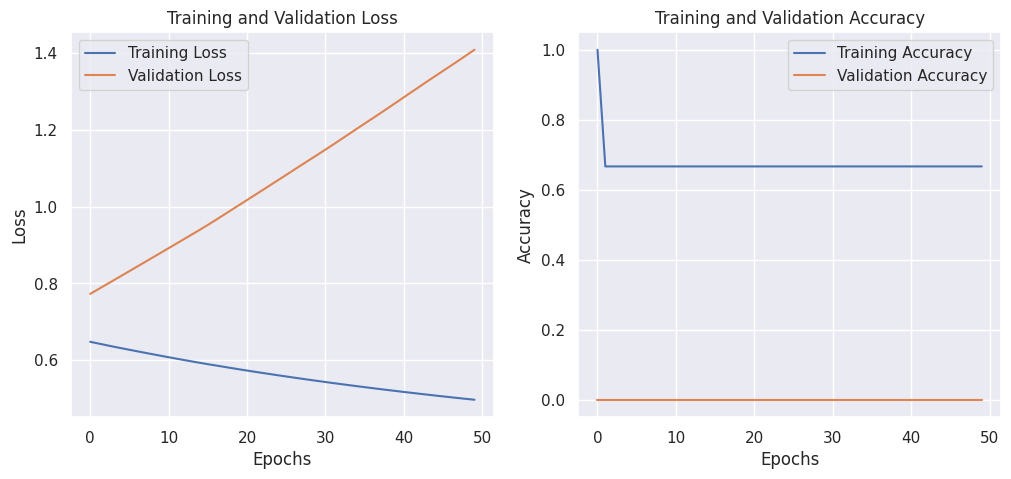

In [102]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# Assuming x_train and y_train are your training data
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=50, validation_split=0.1, shuffle=True)

# Plotting training history
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [103]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Assuming x_train and y_train are your training data
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x=x_train, y=y_train, epochs=50, validation_split=0.1, shuffle=True)


Epoch 1/50
1/1 [==============================] - 1s 707ms/step - loss: 0.6614 - accuracy: 1.0000 - val_loss: 0.7161 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 47ms/step - loss: 0.6578 - accuracy: 0.6667 - val_loss: 0.7236 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6542 - accuracy: 0.6667 - val_loss: 0.7310 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6507 - accuracy: 0.6667 - val_loss: 0.7384 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6472 - accuracy: 0.6667 - val_loss: 0.7456 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6438 - accuracy: 0.6667 - val_loss: 0.7527 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6405 - accuracy: 0.6667 - val_loss: 0.7596 - val_accuracy: 0.0000e+0

#### Extra Model Training

In [ ]:
from keras.models import load_model

model = load_model("Dogs_Cats_model_01.h5")


In [104]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Assuming x_train and y_train are your training data
x_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 1, 1, 0])

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x=x_train, y=y_train, epochs=50, validation_split=0.1, shuffle=True)


Epoch 1/50
1/1 [==============================] - 1s 754ms/step - loss: 0.6741 - accuracy: 0.6667 - val_loss: 0.7469 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6706 - accuracy: 0.3333 - val_loss: 0.7542 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6673 - accuracy: 0.6667 - val_loss: 0.7616 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6639 - accuracy: 0.6667 - val_loss: 0.7689 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.6607 - accuracy: 0.6667 - val_loss: 0.7762 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 38ms/step - loss: 0.6575 - accuracy: 0.6667 - val_loss: 0.7835 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6543 - accuracy: 0.6667 - val_loss: 0.7909 - val_accuracy: 0.0000e+0

In [105]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])  # Memastikan metrik 'accuracy' (yang sama dengan 'binary_accuracy') dimonitor

history = model.fit(x_train, y_train, epochs=50, validation_split=0.1, shuffle=True)

len(history.history["accuracy"])  # Menggunakan "accuracy" karena "binary_accuracy" mungkin tidak tersedia dalam riwayat


Epoch 1/50
1/1 [==============================] - 1s 905ms/step - loss: 0.5440 - accuracy: 0.6667 - val_loss: 1.1523 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 35ms/step - loss: 0.5420 - accuracy: 0.6667 - val_loss: 1.1627 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 0.5398 - accuracy: 0.6667 - val_loss: 1.1735 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 36ms/step - loss: 0.5376 - accuracy: 0.6667 - val_loss: 1.1840 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 35ms/step - loss: 0.5355 - accuracy: 0.6667 - val_loss: 1.1943 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.5334 - accuracy: 0.6667 - val_loss: 1.2045 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 36ms/step - loss: 0.5312 - accuracy: 0.6667 - val_loss: 1.2144 - val_accuracy: 0.0000e+0

50

#### Model Training History

In [106]:
import numpy as np

# Mengakses nilai akurasi dari objek history
accuracy = model.history.history['accuracy']

# Membuat array untuk epoch
epochs = np.arange(1, len(accuracy) + 1, 1)

# Mencetak array epoch dan nilai akurasi
print("Epochs:", epochs)
print("Accuracy:", accuracy)


Epochs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
Accuracy: [0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.6666666865348816, 0.66666

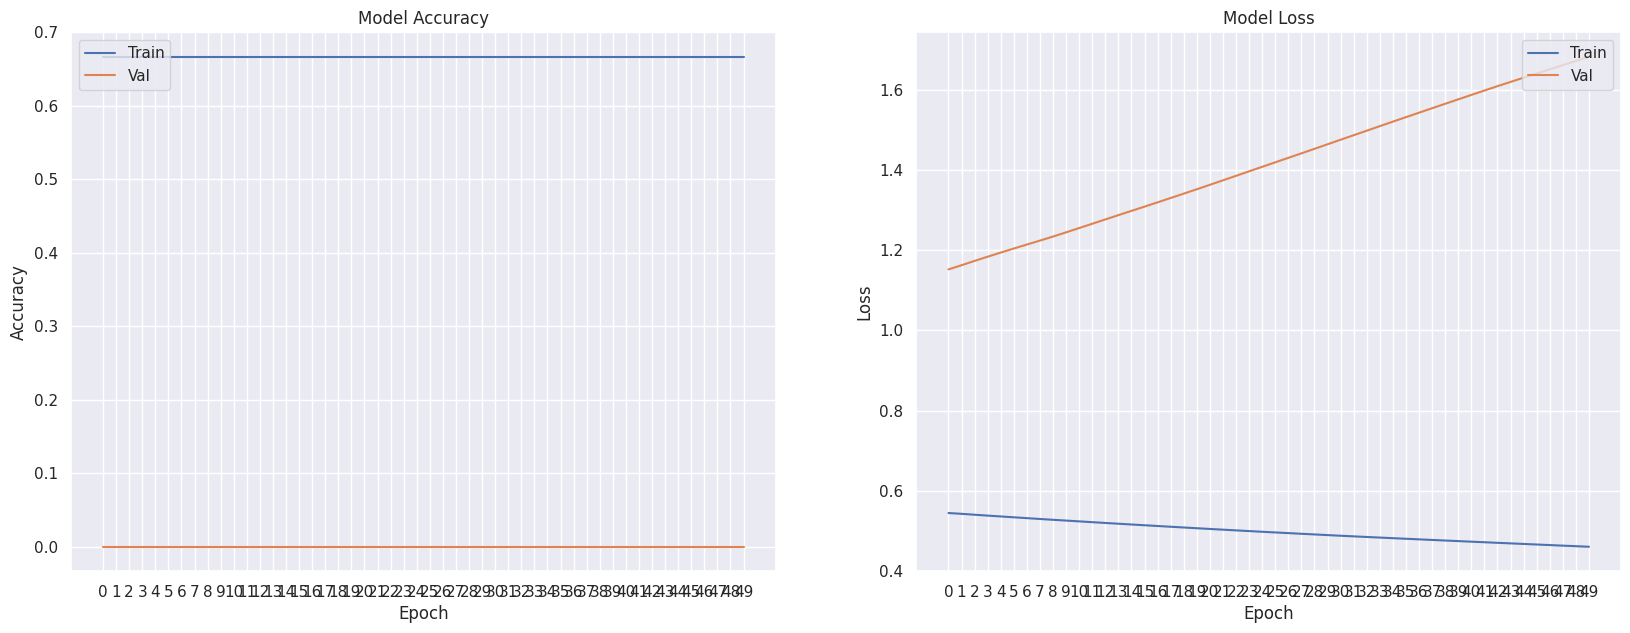

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])  # Ubah "binary_accuracy" menjadi "accuracy"
plt.plot(history.history["val_accuracy"])  # Ubah "val_binary_accuracy" menjadi "val_accuracy"
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.xticks(np.arange(0, len(history.history["accuracy"]), 1))

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.xticks(np.arange(0, len(history.history["loss"]), 1))
plt.show()


---

#### Data Load(for Test)

In [108]:
import glob

# Mencari semua file dengan ekstensi .jpg di dalam direktori ../input/test1/test1/
test_list = glob.glob("../input/test1/*.jpg")

# Melakukan iterasi dan mencetak daftar file yang ditemukan
for file_path in test_list:
    print(file_path)


Output streaming akan dipotong hingga 5000 baris terakhir.
../input/test1/3936.jpg
../input/test1/7707.jpg
../input/test1/6367.jpg
../input/test1/3664.jpg
../input/test1/1037.jpg
../input/test1/5590.jpg
../input/test1/3332.jpg
../input/test1/6468.jpg
../input/test1/11706.jpg
../input/test1/7400.jpg
../input/test1/1586.jpg
../input/test1/4170.jpg
../input/test1/527.jpg
../input/test1/5188.jpg
../input/test1/8167.jpg
../input/test1/11443.jpg
../input/test1/5463.jpg
../input/test1/4157.jpg
../input/test1/10250.jpg
../input/test1/8965.jpg
../input/test1/7961.jpg
../input/test1/8474.jpg
../input/test1/4345.jpg
../input/test1/8775.jpg
../input/test1/6983.jpg
../input/test1/7241.jpg
../input/test1/592.jpg
../input/test1/4468.jpg
../input/test1/6322.jpg
../input/test1/765.jpg
../input/test1/6466.jpg
../input/test1/4723.jpg
../input/test1/2216.jpg
../input/test1/11095.jpg
../input/test1/7384.jpg
../input/test1/10154.jpg
../input/test1/3457.jpg
../input/test1/6008.jpg
../input/test1/10395.jpg
..

In [109]:
from tqdm import tqdm

# Contoh penggunaan tqdm
x_test = []

for i in tqdm(test_list):
    temp = img.open(i).resize((64, 64))
    temp = temp.convert("L")
    x_test.append((np.array(temp) - np.mean(temp)) / np.std(temp))

print("Test images loading is done")


100%|██████████| 12500/12500 [00:33<00:00, 371.66it/s]

Test images loading is done


In [110]:
import numpy as np

# Konversi x_test menjadi array numpy
a = np.asarray(x_test)

# Melakukan reshape dengan dimensi yang sesuai untuk data gambar
x_test = a.reshape(a.shape[0], 1, a.shape[2], a.shape[1])


In [111]:
del(a)

#### Predict

In [112]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import LeakyReLU

model = keras.models.Sequential()

model.add(Conv2D(filters=32, kernel_size=(2, 2), input_shape=(64, 64, 1), data_format='channels_last'))
model.add(LeakyReLU())
model.add(keras.layers.Dropout(rate=0.3))

model.add(Conv2D(filters=32, kernel_size=(3, 3), data_format='channels_last'))
model.add(LeakyReLU())
model.add(keras.layers.Dropout(rate=0.3))

model.add(Conv2D(filters=64, activation="relu", kernel_size=(3, 3), data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(3, 3), data_format='channels_last'))
model.add(keras.layers.Dropout(rate=0.3))

model.add(Flatten())
model.add(Dense(units=12, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))


In [113]:
idx = []
for i in test_list:
    idx.append(i[21:-4])

In [114]:
import numpy as np

# Reshape x_test to match the model input shape
x_test_reshaped = x_test.reshape(x_test.shape[0], 64, 64, 1)

# Now you can use the reshaped data for prediction
result = model.predict(x=x_test_reshaped)

# Reshape the result
result = result.reshape(result.shape[0])

# Apply thresholding
result[result > 0.5] = 1
result[result < 0.5] = 0


391/391 [==============================] - 50s 128ms/step


In [115]:
submission = {"id": idx, "label": result}

In [116]:
pd.DataFrame(submission).to_csv("submission.csv", index=False)

In [117]:
pd.DataFrame(submission)

,id,label
0,,0.0
1,,0.0
2,,0.0
3,,0.0
4,,0.0
...,...,...
12495,,0.0
12496,,0.0
12497,,0.0
12498,,0.0
